(-0.5, 1499.5, 1159.5, -0.5)

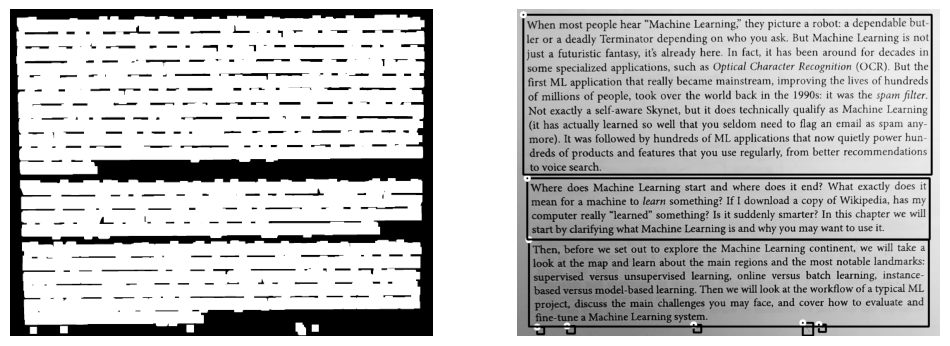

In [7]:
# Import required packages
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Mention the installed location of Tesseract-OCR in your system
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # IMPORTANT !!!!!!!!!!!!

# Read image from which text needs to be extracted
img = cv2.imread("text_images/paragraph4.jpeg")

# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# dilation parameter , bigger means less rect
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))

# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

# Creating a copy of image
im2 = gray.copy()


cnt_list=[]
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 5)
    cv2.circle(im2,(x,y),8,(255,255,0),8)

    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]

    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)

    cnt_list.append([x,y,text])


# this list sorts text with respect to their coordinates , in this way texts are in order from top to down
sorted_list = sorted(cnt_list, key=lambda x: x[1])

# A text file is created 
file = open("extracted-text.txt", "w+")
file.write("")
file.close()


for x,y,text in sorted_list:
    # Open the file in append mode
    file = open("extracted-text.txt", "a")

    # Appending the text into file
    file.write(text)
    file.write("\n")

    # Close the file
    file.close()


# read image 
rgb_image = cv2.resize(im2, (0, 0), fx = 0.4, fy = 0.4)
dilation = cv2.resize(dilation, (0, 0), fx = 0.4, fy = 0.4)

plt.figure(figsize=(12,12))

plt.subplot(121)
plt.imshow(dilation,cmap="gray")
plt.axis('off')

plt.subplot(122)
plt.imshow(im2,cmap="gray")

plt.axis('off')


<br>

### Print Extracted Text

In [8]:
with open("extracted-text.txt", "r") as file:
    content = file.read()
    print(content)

When most people hear “Machine Learning,’ they picture a robot: a dependable but-
ler or a deadly Terminator depending on who you ask. But Machine Learning is not
just a futuristic fantasy, it’s already here. In fact, it has been around for decades in
some specialized applications, such as Optical Character Recognition (OCR). But the
first ML application that really became mainstream, improving the lives of hundreds

of millions of people, took over the world back in the 1990s: it was the spam filter.
Not exactly a self-aware Skynet, but it does technically qualify as Machine Learning
(it has actually learned so well that you seldom need to flag an email as spam any-
more). It was followed by hundreds of ML applications that now quietly power hun-
dreds of products and features that you use regularly, from better recommendations
to voice search.


Where does Machine Learning start and where does it end? What exactly does it
mean for a machine to learn something? If I download a copy of